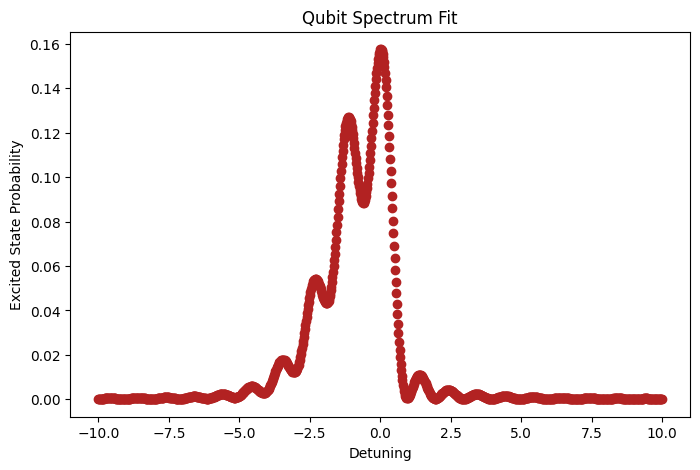

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import poisson

def rabi_probability(detuning, omega_r, t):
    """Probability of detecting qubit in excited state based on Rabi oscillations."""
    return (omega_r**2 / (omega_r**2 + detuning**2)) * np.sin(np.sqrt(omega_r**2 + detuning**2) * t *2*np.pi / 2) ** 2

def spectrum_model(detuning, omega_r, t, chi, avg_photons):
    """Model combining Poisson distribution with Rabi oscillation probability."""
    prob_excited = np.zeros_like(detuning)
    for n in range(20):  # Sum over a reasonable number of photon states
        poisson_weight = poisson.pmf(n, avg_photons)
        prob_excited +=  poisson_weight * rabi_probability(detuning+chi*n, omega_r, t, )
    return  prob_excited

# Generate synthetic data
detuning = np.linspace(-10, 10, 1000)
true_params = [0.2, 1.0, 1.1, 0.8]  # [ omega_r, t, chi, avg_photons]
data = spectrum_model(detuning, *true_params) #+ 0.005 * np.random.randn(len(detuning))

# Fit the model to data
#popt, _ = curve_fit(spectrum_model, detuning, data, p0=[1, 4, 0.4, 1])

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(detuning, data, label="Data", color='firebrick')
#plt.plot(detuning, spectrum_model(detuning, *popt), label="Fit", color='red')
plt.xlabel("Detuning")
plt.ylabel("Excited State Probability")
plt.title("Qubit Spectrum Fit")
plt.show()

#print("Fitted parameters:", popt)


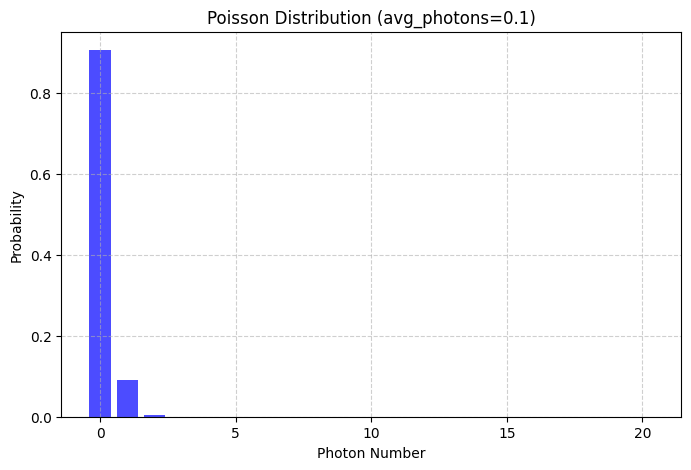

In [33]:
n_max = 20
avg_photons = 0.1
n = np.arange(0, n_max + 1)
pdf = poisson.pmf(n, avg_photons)

plt.figure(figsize=(8, 5))
plt.bar(n, pdf, color='blue', alpha=0.7)
plt.xlabel("Photon Number")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution (avg_photons={avg_photons})")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()